In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Charger les données dans un DataFrame
df=pd.read_csv("sign_mnist_train.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [31]:
# Charger les données dans un DataFrame
test=pd.read_csv("sign_mnist_test.csv")
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [5]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### **Visualisation des donneés![american_sign_language.PNG](data:image/png;base64)

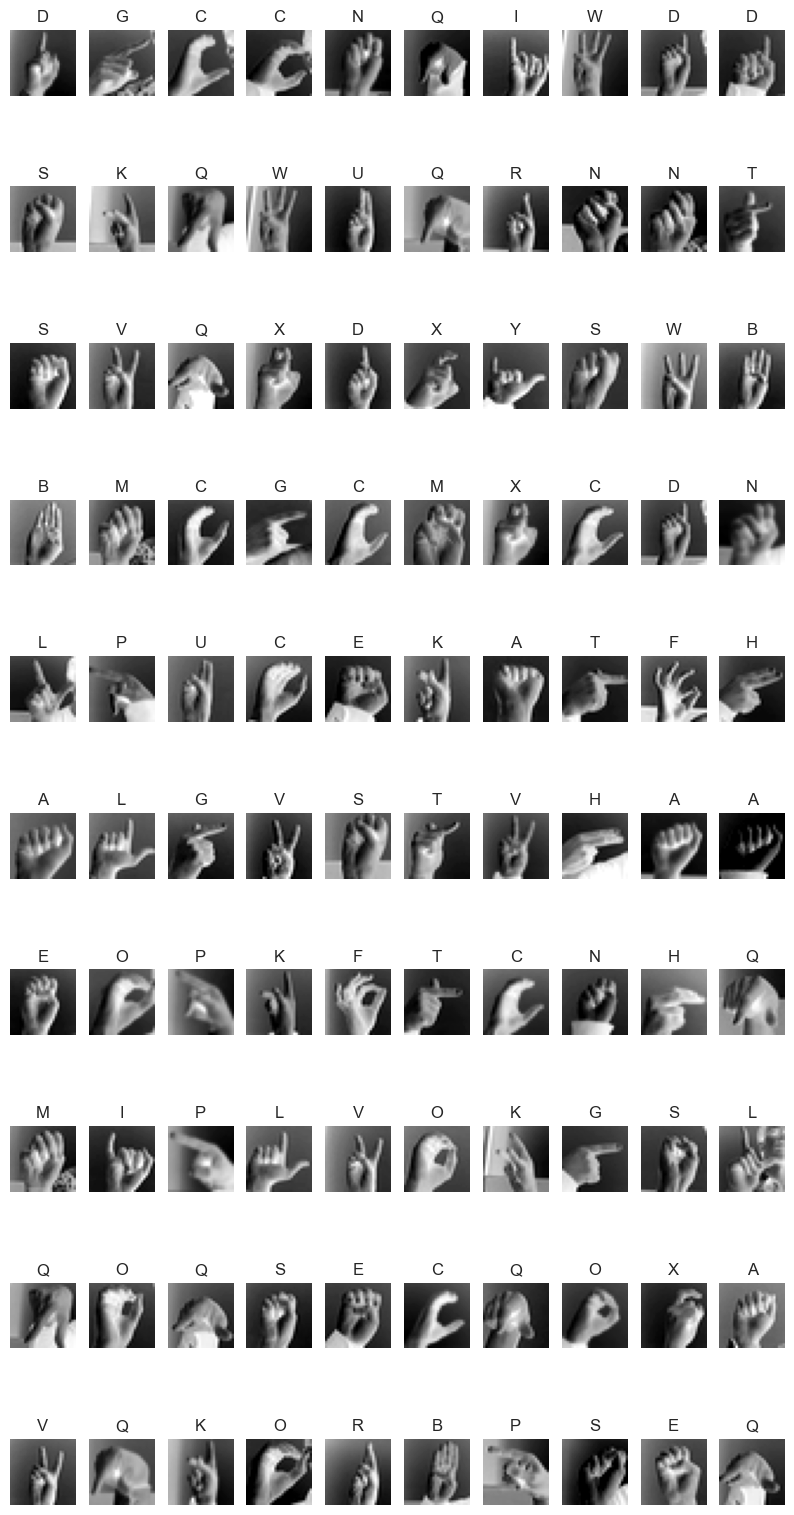

In [6]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
n_samples = len(df.index)
images = np.array(df.drop(['label'],axis=1))
images = images.reshape(n_samples,28,28)
plt.figure(figsize=(10,20))
for i in range(0,100) :
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[df.label[i]])

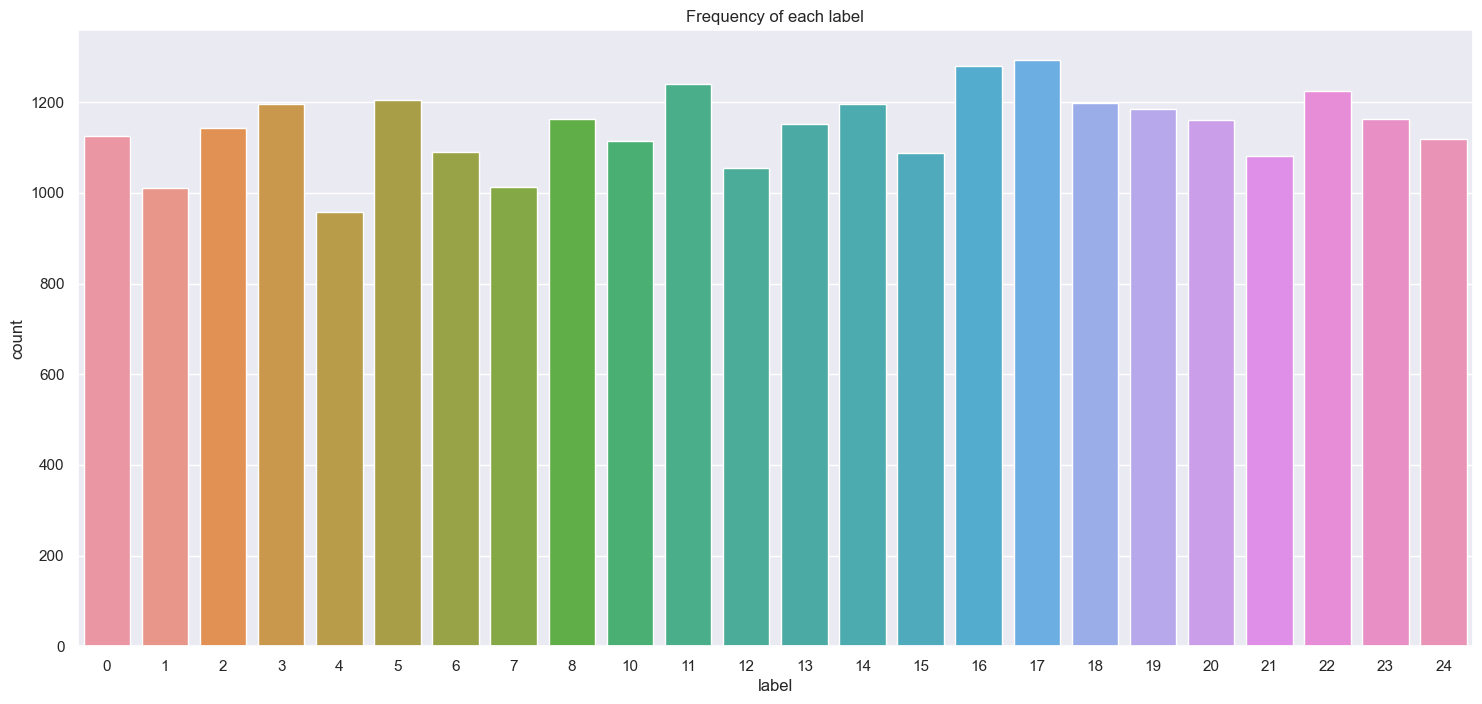

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x=df['label'],data=df)
plt.title("Frequency of each label")
plt.show()

In [8]:
X_train=df.drop(['label'],axis=1)
y_train=df['label']
y=df['label'].values

In [9]:

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(y)

In [10]:
images= X_train.values
images= np.array([np.reshape(i,(28,28)) for i in images])
images= np.array([i.flatten() for i in images])

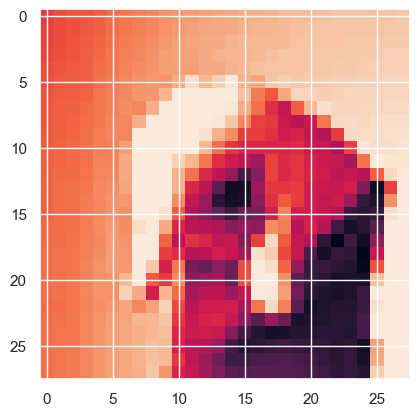

In [11]:
plt.imshow(images[5].reshape(28,28))

In [12]:
#from google.colab.patches import cv2_imshow
import cv2
for i in range(0,10):
  rand = np.random.randint(0,len(images))
  input_im = images[rand]
  sample = input_im.reshape(28,28).astype(np.uint8)
  sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
  cv2.imshow(sample)
  cv2.waitkey(0)


cv2.destroyAllWindows()

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [18]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [20]:
X_train= X_train/255
X_test=X_test/255

In [21]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [22]:
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [23]:
model = Sequential([Conv2D(64,  kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
                    MaxPool2D(2,2, padding='same'),


                    Conv2D(filters=64,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),


                    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),



                    Flatten(),

                    Dense(128, activation="relu"),
                    Dropout(0.2),



                    Dense(units=24, activation="softmax"),
])

In [24]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=128)

Epoch 1/30


172/172 [==============================] - 6s 31ms/step - loss: 2.2184 - accuracy: 0.3170 - val_loss: 0.9148 - val_accuracy: 0.7223
Epoch 2/30
172/172 [==============================] - 5s 31ms/step - loss: 0.6810 - accuracy: 0.7684 - val_loss: 0.2998 - val_accuracy: 0.9153
Epoch 3/30
172/172 [==============================] - 6s 33ms/step - loss: 0.2887 - accuracy: 0.9047 - val_loss: 0.1133 - val_accuracy: 0.9703
Epoch 4/30
172/172 [==============================] - 6s 34ms/step - loss: 0.1410 - accuracy: 0.9561 - val_loss: 0.0488 - val_accuracy: 0.9914
Epoch 5/30
172/172 [==============================] - 6s 33ms/step - loss: 0.0805 - accuracy: 0.9756 - val_loss: 0.0208 - val_accuracy: 0.9987
Epoch 6/30
172/172 [==============================] - 6s 32ms/step - loss: 0.0527 - accuracy: 0.9847 - val_loss: 0.0108 - val_accuracy: 0.9996
Epoch 7/30
172/172 [==============================] - 5s 31ms/step - loss: 0.0376 - accuracy: 0.9902 - val_loss: 0.0057 - val_accuracy: 0.99

In [27]:
model.save('sign_30')

INFO:tensorflow:Assets written to: sign_30\assets


INFO:tensorflow:Assets written to: sign_30\assets


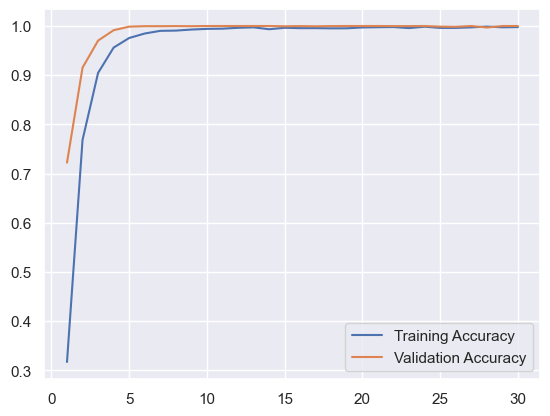

In [28]:
# graphique
epoch_list = list(range(1, len(history.history['accuracy']) + 1))
plt.plot(epoch_list, history.history['accuracy'])
plt.plot(epoch_list, history.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [32]:
test_labels=test['label']
test.drop('label',axis=1,inplace =True)
test_im= test.values
test_im= np.array([np.reshape(i,(28,28)) for i in test_im])
test_im= np.array([i.flatten() for i in test_im])

In [33]:
test_labels = label_binarizer.fit_transform(test_labels)
test_im=test_im.reshape(test_im.shape[0],28,28,1)
y_pred=model.predict(test_im)
accuracy_score(test_labels,y_pred.round())

225/225 [==============================] - 1s 3ms/step


0.8830172894590073

In [50]:
loss, acc = model.evaluate(X_train,y_train)

687/687 [==============================] - 2s 3ms/step - loss: 3.9772e-04 - accuracy: 1.0000


In [49]:
loss, acc = model.evaluate(test_im, test_labels)

225/225 [==============================] - 1s 3ms/step - loss: 129.5646 - accuracy: 0.8830


In [34]:
def getLetter(res):
  classLabels ={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
  try:
    res = int(res)
    return classLabels[res]
  except:
    return 'error'

In [41]:
import cv2
import numpy as np

# Assuming model is your Keras Sequential model
# Define getLetter function if not already defined

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # Check if the frame is read successfully
    if not ret:
        print("Error: Couldn't read frame.")
        break

    # Extract the region of interest (ROI)
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)

    # Convert the ROI to grayscale and resize
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_gray = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)
    cv2.imshow('roi scaled and gray', roi_gray)

    # Make a copy of the frame
    copy = frame.copy()

    # Draw a rectangle on the copy
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    # Reshape the ROI for prediction
    roi_gray = roi_gray.reshape(1, 28, 28, 1)

    # Make a prediction using the model
    predictions = model.predict(roi_gray)

    # Find the class with the highest probability
    predicted_class = np.argmax(predictions)

    # Convert the predicted class to a string
    result = str(predicted_class)

    # Display the predicted letter on the frame
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('frame', copy)

    # Break the loop if Enter key is pressed
    if cv2.waitKey(1) == 13:
        break

# Release the webcam
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
